In [1]:
%load_ext autoreload

In [1]:
import torch
from rambo_generator import FlatInvertiblePhasespace
#from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from utils import *
torch.set_default_dtype(torch.double)

In [2]:
import sys
sys.path.append("/home/valsdav/code/MEM/LHAPDF-6.5.3_install/lib/python3.9/site-packages")
import lhapdf
pdf = lhapdf.mkPDF("NNPDF40_nnlo_hessian_pdfas",0)

LHAPDF 6.5.3 loading /opt/LHAPDF/share/LHAPDF/NNPDF40_nnlo_hessian_pdfas/NNPDF40_nnlo_hessian_pdfas_0000.dat
NNPDF40_nnlo_hessian_pdfas PDF set, member #0, version 1; LHAPDF ID = 331600


In [3]:
TOP_MASS = 172.76
HIGGS_MASS = 125.25
E_CM = 13000
final_masses = torch.tensor([HIGGS_MASS, TOP_MASS, TOP_MASS], requires_grad=False)

In [10]:
gen = FlatInvertiblePhasespace([0.,0.],[HIGGS_MASS, TOP_MASS, TOP_MASS], 
                                   pdf=pdf, pdf_active=True, tau=False)
gen_tau = FlatInvertiblePhasespace([0.,0.],[HIGGS_MASS, TOP_MASS, TOP_MASS], 
                                   pdf=pdf, pdf_active=True, tau=True)

In [5]:
gen.nDimPhaseSpace()

5

In [6]:
FlatInvertiblePhasespace.get_flatWeights(13000, 3)

21291.052028166854

generateKinematics_batch(self, E_cm, random_variables_full, pT_mincut=-1, delR_mincut=-1, rap_maxcut=-1,pdgs=[0,0]):

In [11]:
r_initial = torch.rand(10000, 7)

In [12]:
%%time
p, w, x1, x2 = gen.generateKinematics_batch(E_CM, r_initial, pdgs=[21,21])
#p_tau, w_tau, *others = gen_tau.generateKinematics_batch(E_CM, r_initial, pdgs=[21,21])

CPU times: user 348 ms, sys: 4.99 ms, total: 353 ms
Wall time: 270 ms


## Debugging plots

NameError: name 'w_tau' is not defined

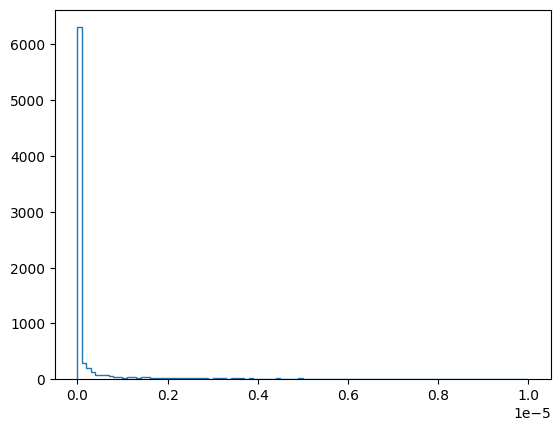

In [13]:
plt.hist(w, bins=100,range=(0,1e-5),histtype="step", label="Tau Off")
plt.hist(w_tau, bins=100, range=(0,1e-5), histtype="step", label="Tau ON")
#plt.yscale("log")
plt.xlabel("Weight")
plt.legend()

NameError: name 'p_tau' is not defined

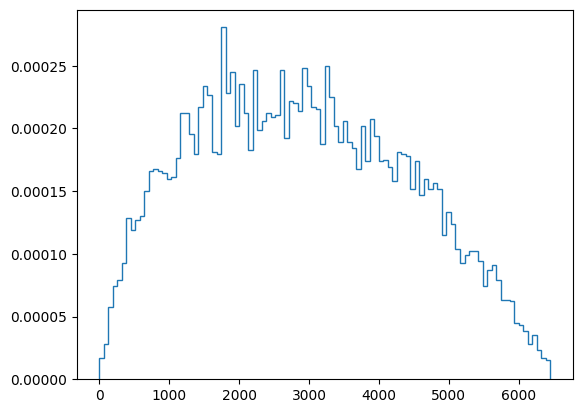

In [14]:
plt.hist(p[:,0,0], bins=100, density=True, histtype="step", label="Tau Off")
plt.hist(p_tau[:,0,0], bins=100, density=True, histtype="step", label="Tau on")
plt.xlabel("Gluon En")
plt.legend()

NameError: name 'p_tau' is not defined

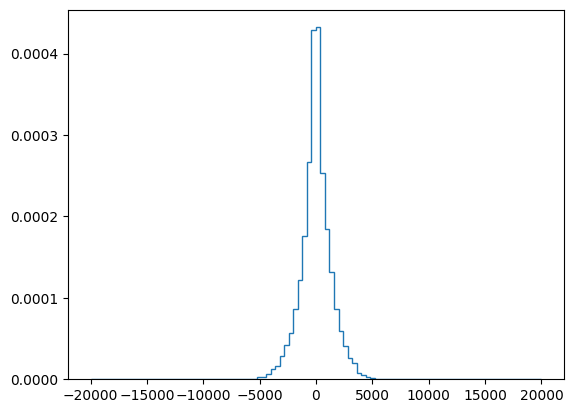

In [15]:
plt.hist(p[:,2,3], bins=100, range=(-20000,20000), density=True, histtype="step", label="No tau")
plt.hist(p_tau[:,2,3], bins=100,range=(-20000,20000),  density=True, histtype="step", label="tau")
#plt.hist(p_lab[:,2,3], bins=100,range=(-20000,20000),  density=True, histtype="step", label="tau")
plt.xlabel("Higgs Pz")
plt.legend()

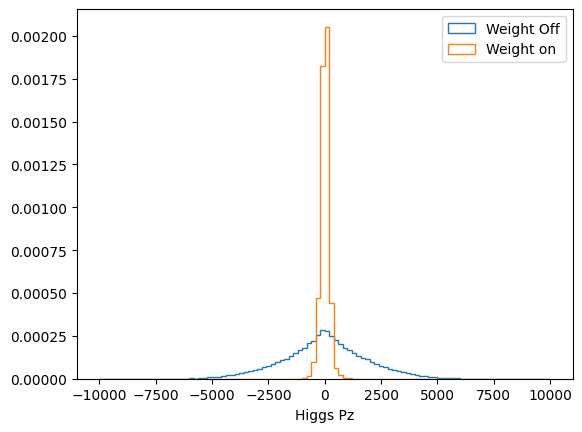

In [28]:
plt.hist(p_tau[:,2,3], bins=100, range=(-10000,10000), density=True, histtype="step", label="Weight Off")
plt.hist(p_tau[:,2,3], weights=w_tau, bins=100,range=(-10000,10000),  density=True, histtype="step", label="Weight on")
plt.xlabel("Higgs Pz")
plt.legend()

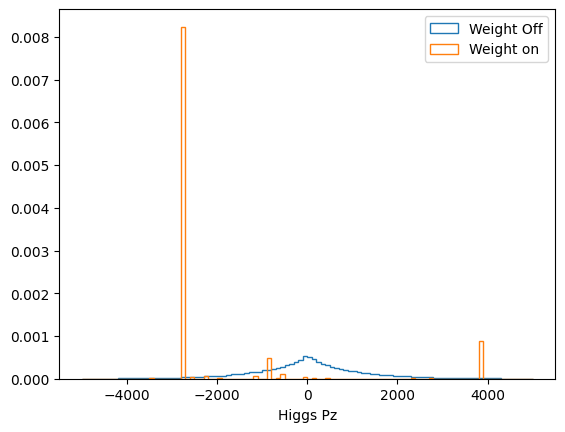

In [29]:
plt.hist(p[:,2,3], bins=100, range=(-5000,5000), density=True, histtype="step", label="Weight Off")
plt.hist(p[:,2,3], weights=w, bins=100,range=(-5000,5000),  density=True, histtype="step", label="Weight on")
plt.xlabel("Higgs Pz")
plt.legend()

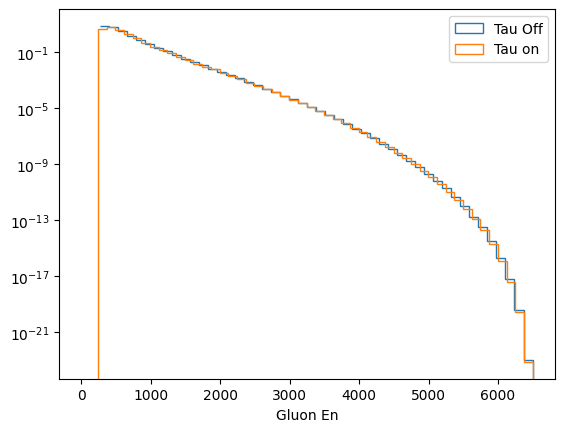

In [46]:
plt.hist(p[:,0,0], weights=w, bins=50,  histtype="step", label="Tau Off")
plt.hist(p_tau[:,0,0], weights=w_tau, bins=50, histtype="step", label="Tau on")
plt.xlabel("Gluon En")
plt.yscale("log")
plt.legend()

Text(0.5, 0, 'Pz')

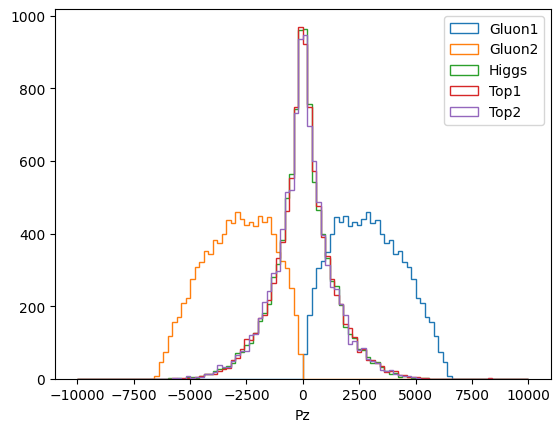

In [16]:
plt.hist(p[:,0,3], bins=100, range=(-1e4,1e4), histtype="step", label="Gluon1")
plt.hist(p[:,1,3], bins=100, range=(-1e4,1e4), histtype="step", label="Gluon2")
plt.hist(p[:,2,3], bins=100, range=(-1e4,1e4), histtype="step", label="Higgs")
plt.hist(p[:,3,3], bins=100, range=(-1e4,1e4), histtype="step", label="Top1")
plt.hist(p[:,4,3], bins=100, range=(-1e4,1e4), histtype="step", label="Top2")
plt.legend()
plt.xlabel("Pz")

Text(0.5, 0, 'En')

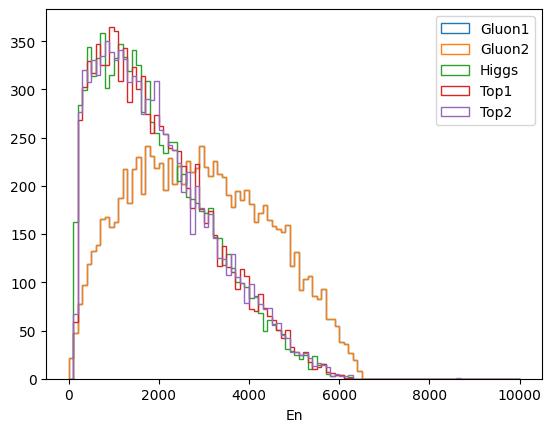

In [17]:
plt.hist(p[:,0,0], bins=100, range=(0,1e4), histtype="step", label="Gluon1")
plt.hist(p[:,1,0], bins=100, range=(0,1e4), histtype="step", label="Gluon2")
plt.hist(p[:,2,0], bins=100, range=(0,1e4), histtype="step", label="Higgs")
plt.hist(p[:,3,0], bins=100, range=(0,1e4), histtype="step", label="Top1")
plt.hist(p[:,4,0], bins=100, range=(0,1e4), histtype="step", label="Top2")
plt.legend()
plt.xlabel("En")

Text(0.5, 0, 'Px')

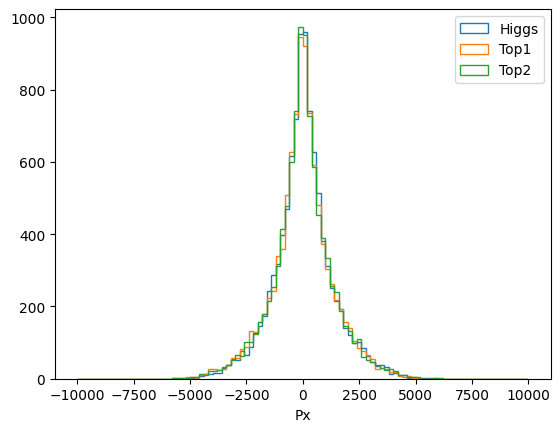

In [18]:
#plt.hist(p[:,0,1], bins=100, range=(0,1e4), histtype="step", label="Gluon1")
#plt.hist(p[:,1,1], bins=100, range=(0,1e4), histtype="step", label="Gluon2")
plt.hist(p[:,2,1], bins=100, range=(-1e4,1e4), histtype="step", label="Higgs")
plt.hist(p[:,3,1], bins=100, range=(-1e4,1e4), histtype="step", label="Top1")
plt.hist(p[:,4,1], bins=100, range=(-1e4,1e4), histtype="step", label="Top2")
plt.legend()
plt.xlabel("Px")

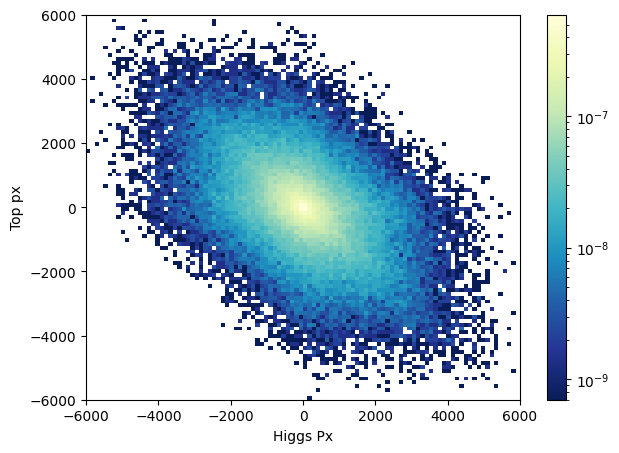

In [55]:
plt.figure(figsize=(7,5))
plt.hist2d(p[:,2,1].numpy(),p[:,3,1].numpy(), range=((-6000,6000),(-6000,6000)), 
           bins=100, density=True, cmap="YlGnBu_r", norm=colors.LogNorm())
plt.xlabel("Higgs Px")
plt.ylabel("Top px")
plt.colorbar()

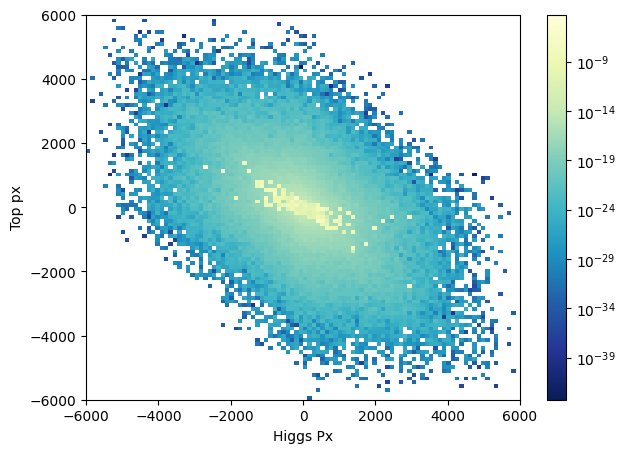

In [56]:
plt.figure(figsize=(7,5))
plt.hist2d(p[:,2,1].numpy(),p[:,3,1].numpy(),
           weights= w, range=((-6000,6000),(-6000,6000)), 
           bins=100, density=True, cmap="YlGnBu_r", norm=colors.LogNorm())
plt.xlabel("Higgs Px")
plt.ylabel("Top px")
plt.colorbar()

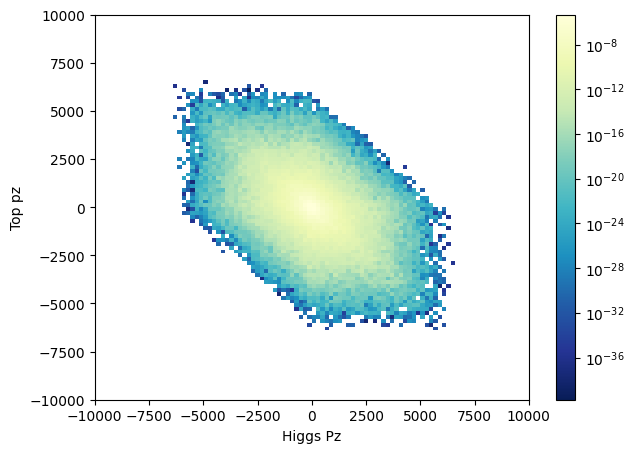

In [57]:
plt.figure(figsize=(7,5))
plt.hist2d(p_tau[:,2,3].numpy(),p_tau[:,3,3].numpy(),
           weights= w_tau, range=((-10000,10000),(-10000,10000)), 
           bins=100, density=True, cmap="YlGnBu_r", norm=colors.LogNorm())
plt.xlabel("Higgs Pz")
plt.ylabel("Top pz")
plt.colorbar()

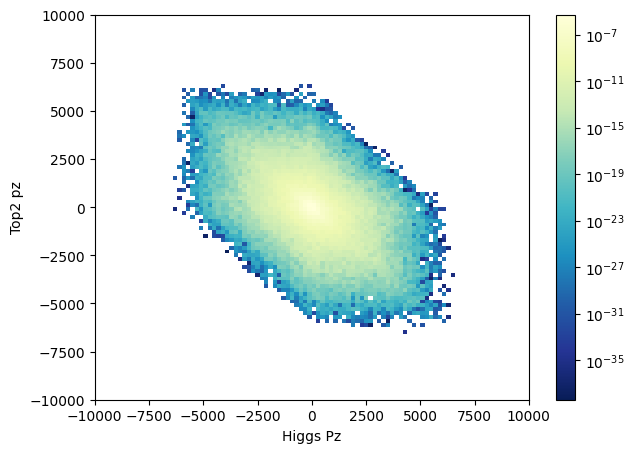

In [58]:
plt.figure(figsize=(7,5))
plt.hist2d(p_tau[:,2,3].numpy(),p_tau[:,4,3].numpy(),
           weights= w_tau, range=((-10000,10000),(-10000,10000)), 
           bins=100, density=True, cmap="YlGnBu_r", norm=colors.LogNorm())
plt.xlabel("Higgs Pz")
plt.ylabel("Top2 pz")
plt.colorbar()

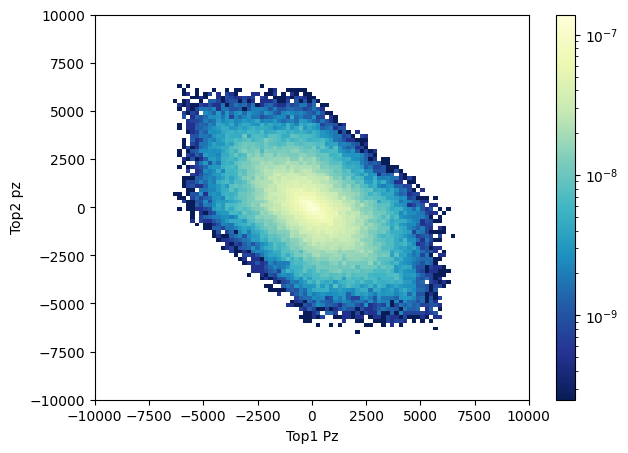

In [59]:
plt.figure(figsize=(7,5))
plt.hist2d(p_tau[:,3,3].numpy(),p_tau[:,4,3].numpy(),
           range=((-10000,10000),(-10000,10000)), 
           bins=100, density=True, cmap="YlGnBu_r", norm=colors.LogNorm())
plt.xlabel("Top1 Pz")
plt.ylabel("Top2 pz")
plt.colorbar()

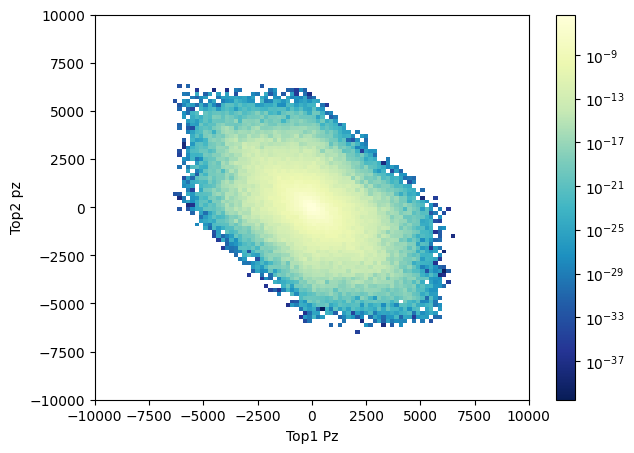

In [60]:
plt.figure(figsize=(7,5))
plt.hist2d(p_tau[:,3,3].numpy(),p_tau[:,4,3].numpy(),
           weights= w_tau, range=((-10000,10000),(-10000,10000)), 
           bins=100, density=True, cmap="YlGnBu_r", norm=colors.LogNorm())
plt.xlabel("Top1 Pz")
plt.ylabel("Top2 pz")
plt.colorbar()

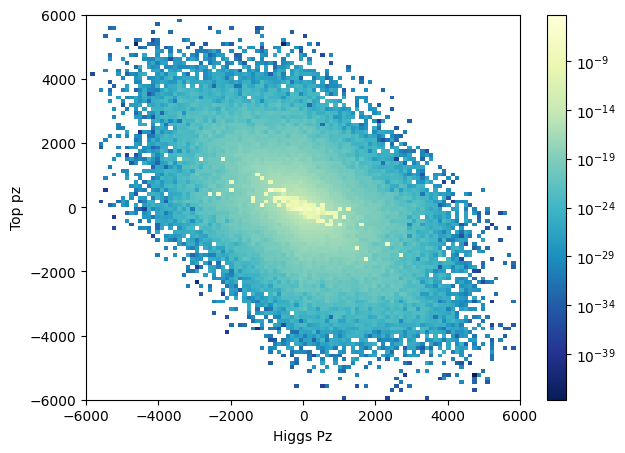

In [61]:
plt.figure(figsize=(7,5))
plt.hist2d(p[:,2,3].numpy(),p[:,3,3].numpy(),
           weights= w, range=((-6000,6000),(-6000,6000)), 
           bins=100, density=True, cmap="YlGnBu_r", norm=colors.LogNorm())
plt.xlabel("Higgs Pz")
plt.ylabel("Top pz")
plt.colorbar()

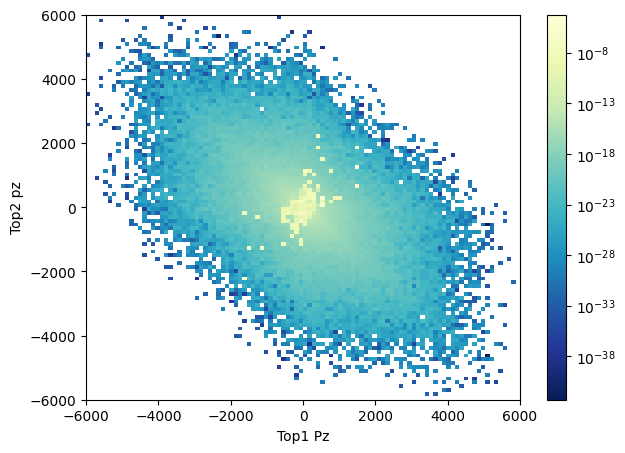

In [62]:
plt.figure(figsize=(7,5))
plt.hist2d(p[:,3,3].numpy(),p[:,4,3].numpy(),
           weights= w, range=((-6000,6000),(-6000,6000)), 
           bins=100, density=True, cmap="YlGnBu_r", norm=colors.LogNorm())
plt.xlabel("Top1 Pz")
plt.ylabel("Top2 pz")
plt.colorbar()

# Inverse transformation

In [64]:
from utils import *

In [20]:
Mfinal =  torch.sqrt(square_t(torch.sum(p_tau[:,2:], axis=1)))
plt.hist(Mfinal, bins=100, density=True, histtype="step", label="Weights Off")
plt.hist(Mfinal, weights=w_tau, bins=100, density=True, histtype="step", label="Weights ON")
plt.xlabel("Final state invariant Mass")
plt.legend()

NameError: name 'p_tau' is not defined

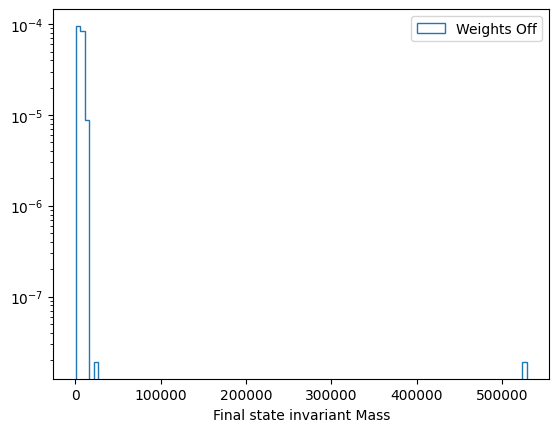

In [22]:
Mfinal =  torch.sqrt(square_t(torch.sum(p[:,2:], axis=1)))
plt.hist(Mfinal, bins=100, density=True, histtype="step", label="Weights Off")
#plt.hist(Mfinal, weights=w, bins=100, density=True, histtype="step", label="Weights ON")
plt.xlabel("Final state invariant Mass")
plt.legend()
plt.yscale("log")

In [23]:
n = 3
P = p[:,2:].clone() # copy
M = torch.tensor([0.]*n,requires_grad=False, dtype=torch.double, device=P.device)
M = torch.unsqueeze(M, 0).repeat(P.shape[0],1)
Q = torch.zeros_like(P)
Q[:,-1] = P[:,-1]  # Qn = pn
#M[:, -1] = torch.sqrt(square_t(P[:, -1], axis=1)))
# intermediate mass
for i in range(n, 0, -1):
    j = i-1
    M[:, j] = torch.sqrt(square_t(torch.sum(P[:, j:n], axis=1)))
    # Rimuovere la massa delle particelle finali
    M[:, j] -= torch.sum(final_masses[j:])

r = torch.zeros(P.shape[0], 5)

In [26]:
for i in range(n, 1, -1):
    j = i-1 #index for 0-based tensors
    # in the direct algo the u are squared. 
    u = (M[:, j]/M[:, j-1])**2
    
    r[:, j-1] = (n+1-i)*(torch.pow(u,(n-i))) - (n-i)*(torch.pow(u,(n+1-i)))
    
    Q[:, j-1] = Q[:, j] + P[:, j-1]
    
    boost_t(P[:, j-1], -boostVector_t(Q[:, j-1]))
   
    r[:, n-5+2*i-1] = ((P[:, j-1, 3]/ torch.sqrt(rho2_t(P[:, j-1]))) + 1)/2
    phi = torch.atan(P[:, j-1, 2]/P[:, j-1, 1])
    # Fixing phi depending on X and y sign
    # 4th quandrant  (px > 0, py < 0)
    deltaphi = torch.where((P[:, j-1, 2]<0)&(P[:, j-1, 1]>0), 2*torch.pi, 0.)
    # 2th and 3th quadratant  (px < 0, py whatever)
    deltaphi += torch.where((P[:, j-1, 1]<0), torch.pi, 0.)
    phi += deltaphi
    r[:, n-4+2*i-1] = phi/(2*torch.pi)
    print(j-1, n-5+2*i-1, n-4+2*i-1)
    print(r[0:5])
    

1 3 4
tensor([[0.0000, 1.0000, 0.0000, 0.8842, 0.7882],
        [0.0000, 1.0000, 0.0000, 0.9937, 0.8363],
        [0.0000, 1.0000, 0.0000, 0.5571, 0.0240],
        [0.0000, 1.0000, 0.0000, 0.8291, 0.8737],
        [0.0000, 1.0000, 0.0000, 0.4820, 0.9691]])
0 1 2
tensor([[0.0778, 0.6976, 0.6670, 0.8842, 0.7882],
        [0.7055, 0.6792, 0.5302, 0.9937, 0.8363],
        [0.9234, 0.0859, 0.0598, 0.5571, 0.0240],
        [0.9368, 0.5032, 0.3659, 0.8291, 0.8737],
        [0.0058, 0.8248, 0.8576, 0.4820, 0.9691]])


In [27]:
r_initial[0:5, 0:5]

tensor([[0.0778, 0.6976, 0.6670, 0.8842, 0.7882],
        [0.7055, 0.6792, 0.5302, 0.9937, 0.8363],
        [0.9234, 0.0859, 0.0598, 0.5571, 0.0240],
        [0.9368, 0.5032, 0.3659, 0.8291, 0.8737],
        [0.0058, 0.8248, 0.8576, 0.4820, 0.9691]])

In [28]:
r_initial[0:15, 0:5] - r[0:15]

tensor([[ 5.5511e-17,  0.0000e+00,  0.0000e+00,  1.1102e-16,  1.1102e-16],
        [ 2.2204e-16,  0.0000e+00,  1.1102e-16,  0.0000e+00,  1.1102e-16],
        [ 2.2204e-16,  5.5511e-17, -1.3878e-17,  0.0000e+00, -1.3878e-17],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 3.1225e-17,  0.0000e+00,  0.0000e+00, -7.7716e-16,  2.2204e-16],
        [ 3.3307e-16,  0.0000e+00,  5.5511e-17,  0.0000e+00,  5.5511e-17],
        [-2.2204e-16, -5.5511e-17,  5.5511e-17,  0.0000e+00,  0.0000e+00],
        [ 1.0408e-16,  0.0000e+00,  0.0000e+00,  0.0000e+00,  4.4409e-16],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  5.5511e-17],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  2.7756e-17],
        [ 1.1102e-16,  0.0000e+00, -1.3878e-17,  0.0000e+00,  0.0000e+00],
        [-1.1102e-16,  1.1102e-16,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [-1.1102e-16,  1.1102e-16,  0.0000e+00,  0.0000e+00, -1.1102e-16],
        [ 2.7756e-17, -5.

(array([4952., 4937., 4993., 5043., 4882., 4891., 4974., 5047., 4928.,
        5073.]),
 array([6.46619209e-07, 9.99998585e-02, 1.99999070e-01, 2.99998282e-01,
        3.99997494e-01, 4.99996706e-01, 5.99995918e-01, 6.99995130e-01,
        7.99994342e-01, 8.99993554e-01, 9.99992766e-01]),
 <BarContainer object of 10 artists>)

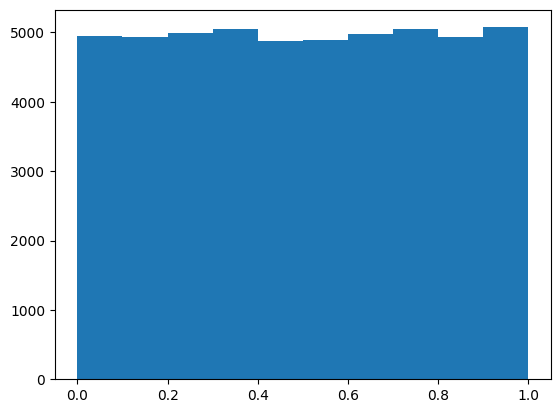

In [29]:
plt.hist(r.flatten())

Text(0.5, 0, '$\\log_{10}(|1- r_f/r_i|)$')

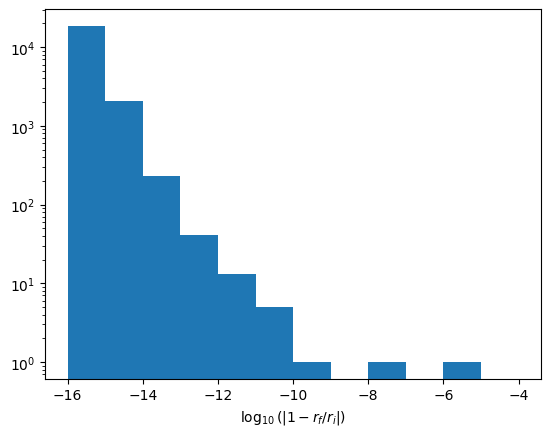

In [33]:
plt.hist(torch.log10(torch.abs(1- r/r_initial[:,:-2])).flatten(), 
        range=(-16,-4), bins=12)
plt.yscale("log")
plt.xlabel("$\log_{10}(|1- r_f/r_i|)$")